In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%%%%%%%%%%%%%%%%%%%%%%%%%%  
Static:
total static - table: Acc   0.05            -> [0,    0.1]
                      Gyro  0.005(0.006)    -> [0,   0.01]

quasi static - play:  Acc   0.3(0.7)        -> [0.1,  0.3]
                      Gyro  0.15            -> [0.01, 0.1]
       
semi  static - stand: Acc   0.2(0.6)        -> [0.3,    1]
                      Gyro  0.06(0.07)      -> [0.1,  0.5]
       
%%%%%%%%%%%%%%%%%%%%%%%%%%   

Motion:      
walk:  Acc   2.2(2.2)                       -> [1,   +inf]
       Gyro  1.1(1.1)                       -> [0.5, +inf]

run:   Acc   6.1(4.5)
       Gyro  2.0(1.5)
       
%%%%%%%%%%%%%%%%%%%%%%%%%%  

# Table - Play - Stand - Walk

In [336]:
!pwd

/Users/Joanna/Desktop/Polaris/3d-tracking-at-gt-main/Station_Detection


In [184]:
std = pd.read_csv('static.csv', index_col = None, header = None)

In [185]:
std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

In [186]:
len(std[0])

195622

### Acceleration

In [187]:
std_acc = std[std[1]==' ACC_UN']

In [188]:
acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

In [189]:
acc_t = std_acc[0].values

Text(0,0.5,u'acceleration (m/s^2)')

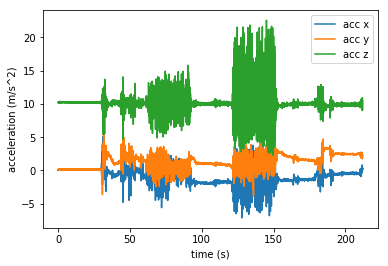

In [190]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

### Gyroscope

In [191]:
std_gyro = std[std[1]==' GYRO_UN']

In [192]:
gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

In [193]:
gyro_t = std_gyro[0].values

Text(0,0.5,u'angular velocity (rad/s)')

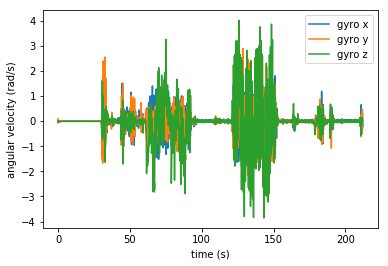

In [194]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

### Stability Detection

In [195]:
g = np.mean(acc_z)
g

10.061778252919034

In [196]:
#w_min = 0.3
w_max = 1.1

In [197]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))

In [198]:
std_static  = np.zeros(len(acc_t))
std_static_quasi  = np.zeros(len(acc_t))
std_static_semi  = np.zeros(len(acc_t))
std_static_total  = np.zeros(len(acc_t))

In [199]:
i = 0
while(acc_t[i] + w_max < round(acc_t[-1])):
        
        # increase to max window size
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
        
        ## update parameters
        if std_acc[i] < 1 and std_gyro[i] < 0.5:
            std_static[i] = 1
            
        if std_acc[i] < 1 and std_acc[i] >= 0.3 and std_gyro[i] < 0.5 and std_gyro[i] >= 0.1:
            std_static_semi[i] = 1
            
        if std_acc[i] < 0.3 and std_acc[i] >= 0.1 and std_gyro[i] < 0.1 and std_gyro[i] >= 0.01:
            std_static_quasi[i] = 1
        
        if std_acc[i] < 0.1 and std_gyro[i] < 0.01:
            std_static_total[i] = 1
    
    ##############
        i = i + 1

Text(0.5,1,u'Detection on Total-Static')

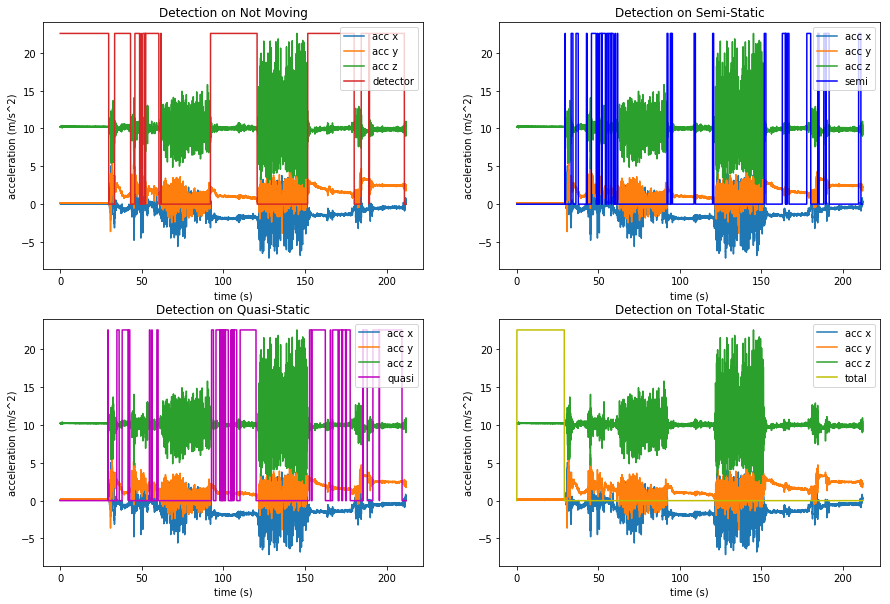

In [203]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static*np.max(acc_z))
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Not Moving')

plt.subplot(222)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static_semi*np.max(acc_z),'b')
plt.legend(['acc x','acc y','acc z','semi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Semi-Static')

plt.subplot(223)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static_quasi*np.max(acc_z),'m')
plt.legend(['acc x','acc y','acc z','quasi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Quasi-Static')

plt.subplot(224)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static_total*np.max(acc_z),'y')
plt.legend(['acc x','acc y','acc z','total'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Total-Static')

Text(0,0.5,u'angular velocity (rad/s) on Total-Static')

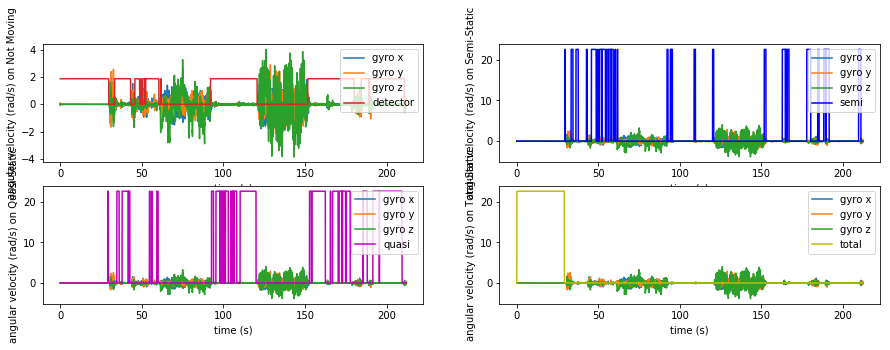

In [207]:
plt.figure(figsize=(15,10))
plt.subplot(421)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Not Moving')

plt.subplot(422)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static_semi*np.max(acc_z),'b')
plt.legend(['gyro x','gyro y','gyro z','semi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Semi-Static')

plt.subplot(423)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static_quasi*np.max(acc_z),'m')
plt.legend(['gyro x','gyro y','gyro z','quasi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Quasi-Static')

plt.subplot(424)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static_total*np.max(acc_z),'y')
plt.legend(['gyro x','gyro y','gyro z','total'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Total-Static')

# 1. Static Put Onto Table

In [208]:
std = pd.read_csv('/Users/Joanna/Documents/PhD/Polaris_Wireless/NLE/Git/new/3d-tracking-at-gt-main/Station_Detection/meas/table.csv', index_col = None, header = None)[0:300000]

In [209]:
std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

### Acceleration

In [210]:
std_acc = std[std[1]==' ACC_UN']

In [211]:
acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

In [212]:
acc_t = std_acc[0].values

Text(0,0.5,u'acceleration (m/s^2)')

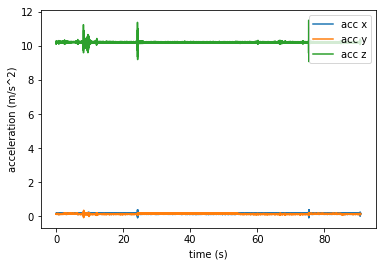

In [213]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

### Gyroscope

In [214]:
std_gyro = std[std[1]==' GYRO_UN']

In [215]:
gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

In [216]:
gyro_t = std_gyro[0].values

Text(0,0.5,u'angular velocity (rad/s)')

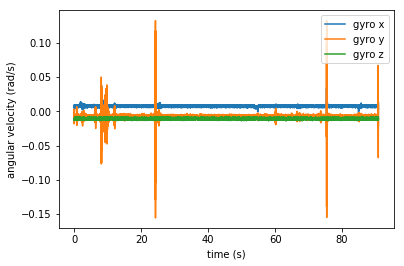

In [217]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

### Stability Detection

In [219]:
g = np.mean(acc_z)
g

10.226603368022488

In [220]:
#w_min = 0.3
w_max = 1.1

In [221]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))

In [222]:
std_static  = np.zeros(len(acc_t))
std_static_quasi  = np.zeros(len(acc_t))
std_static_semi  = np.zeros(len(acc_t))
std_static_total  = np.zeros(len(acc_t))

In [223]:
i = 0
while(acc_t[i] + w_max < round(acc_t[-1])):
        
        # increase to max window size
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
        
        ## update parameters
        if std_acc[i] < 1 and std_gyro[i] < 0.5:
            std_static[i] = 1
            
        if std_acc[i] < 1 and std_acc[i] >= 0.3 and std_gyro[i] < 0.5 and std_gyro[i] >= 0.1:
            std_static_semi[i] = 1
            
        if std_acc[i] < 0.3 and std_acc[i] >= 0.1 and std_gyro[i] < 0.1 and std_gyro[i] >= 0.01:
            std_static_quasi[i] = 1
        
        if std_acc[i] < 0.1 and std_gyro[i] < 0.01:
            std_static_total[i] = 1
    
    ##############
        i = i + 1

Text(0.5,1,u'Detection on Total-Static')

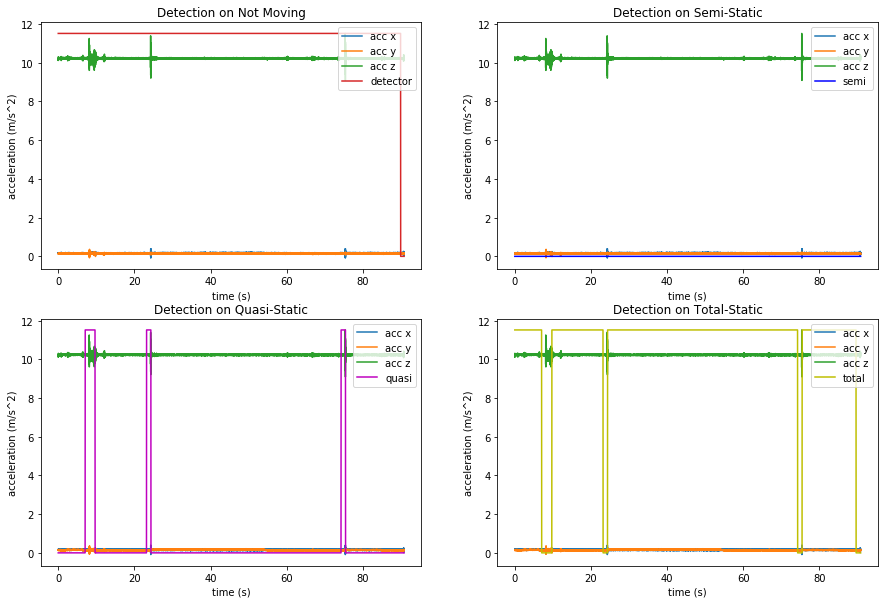

In [224]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static*np.max(acc_z))
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Not Moving')

plt.subplot(222)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static_semi*np.max(acc_z),'b')
plt.legend(['acc x','acc y','acc z','semi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Semi-Static')

plt.subplot(223)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static_quasi*np.max(acc_z),'m')
plt.legend(['acc x','acc y','acc z','quasi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Quasi-Static')

plt.subplot(224)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static_total*np.max(acc_z),'y')
plt.legend(['acc x','acc y','acc z','total'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Total-Static')

Text(0,0.5,u'angular velocity (rad/s) on Total-Static')

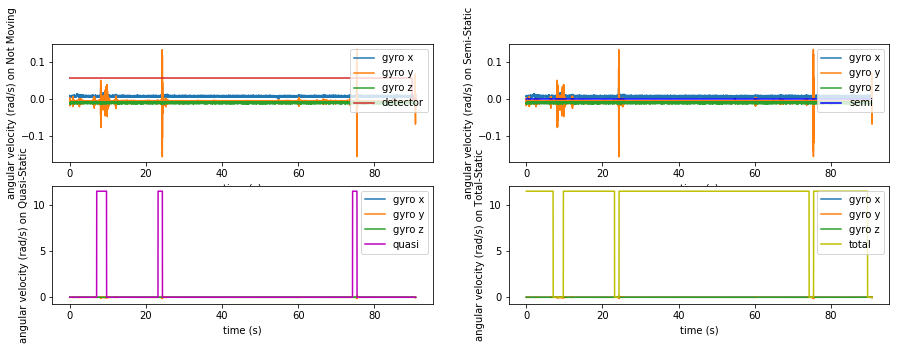

In [225]:
plt.figure(figsize=(15,10))
plt.subplot(421)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Not Moving')

plt.subplot(422)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static_semi*np.max(acc_z),'b')
plt.legend(['gyro x','gyro y','gyro z','semi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Semi-Static')

plt.subplot(423)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static_quasi*np.max(acc_z),'m')
plt.legend(['gyro x','gyro y','gyro z','quasi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Quasi-Static')

plt.subplot(424)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static_total*np.max(acc_z),'y')
plt.legend(['gyro x','gyro y','gyro z','total'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Total-Static')

# 2 Play Cellphone

In [236]:
std = pd.read_csv('/Users/Joanna/Documents/PhD/Polaris_Wireless/NLE/Git/new/3d-tracking-at-gt-main/Station_Detection/meas/play.csv', index_col = None, header = None)[0:100000]

In [237]:
std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

### Acceleration

In [238]:
std_acc = std[std[1]==' ACC_UN']

In [239]:
acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

In [240]:
acc_t = std_acc[0].values

Text(0,0.5,u'acceleration (m/s^2)')

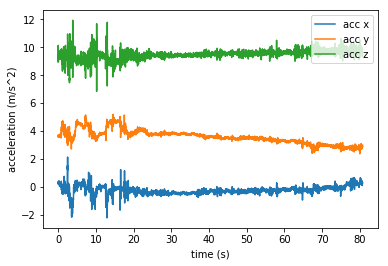

In [241]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

### Gyroscope

In [242]:
std_gyro = std[std[1]==' GYRO_UN']

In [243]:
gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

In [244]:
gyro_t = std_gyro[0].values

Text(0,0.5,u'angular velocity (rad/s)')

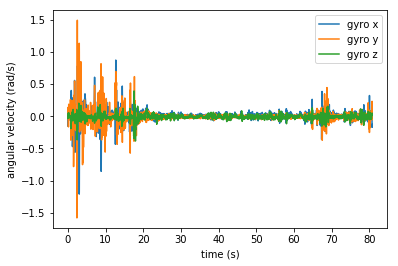

In [245]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

## Stability Detection

In [246]:
g = np.mean(acc_z)
g

9.503968404480991

In [247]:
sig_acc = g
sig_gyro = 0 + 0.5

In [248]:
#w_min = 0.3
w_max = 1.1

In [249]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))

In [250]:
std_static  = np.zeros(len(acc_t))
std_static_quasi  = np.zeros(len(acc_t))
std_static_semi  = np.zeros(len(acc_t))
std_static_total  = np.zeros(len(acc_t))

In [251]:
i = 0
while(acc_t[i] + w_max < round(acc_t[-1])):
        
        # increase to max window size
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
        
        ## update parameters
        if std_acc[i] < 1 and std_gyro[i] < 0.5:
            std_static[i] = 1
            
        if std_acc[i] < 1 and std_acc[i] >= 0.3 and std_gyro[i] < 0.5 and std_gyro[i] >= 0.1:
            std_static_semi[i] = 1
            
        if std_acc[i] < 0.3 and std_acc[i] >= 0.1 and std_gyro[i] < 0.1 and std_gyro[i] >= 0.01:
            std_static_quasi[i] = 1
        
        if std_acc[i] < 0.1 and std_gyro[i] < 0.01:
            std_static_total[i] = 1
    
    ##############
        i = i + 1

Text(0.5,1,u'Detection on Total-Static')

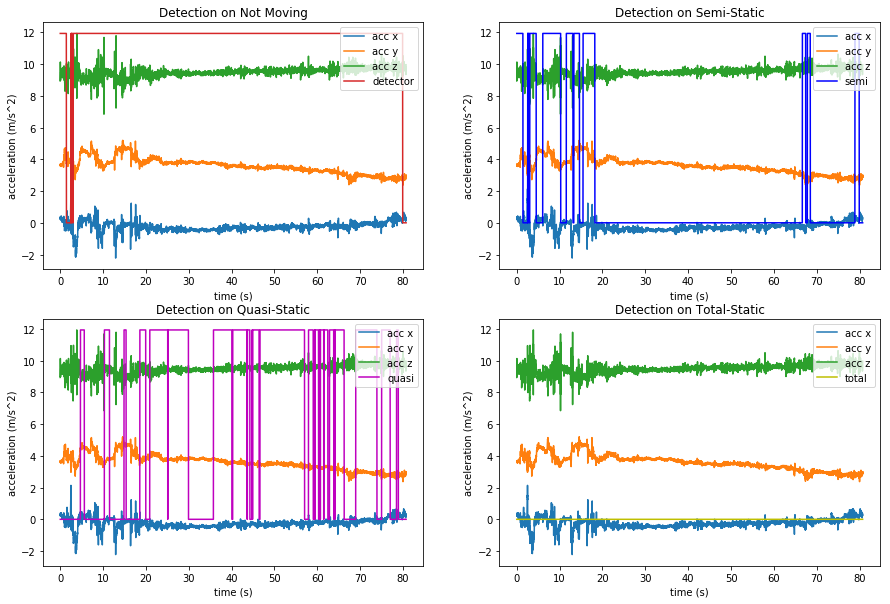

In [252]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static*np.max(acc_z))
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Not Moving')

plt.subplot(222)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static_semi*np.max(acc_z),'b')
plt.legend(['acc x','acc y','acc z','semi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Semi-Static')

plt.subplot(223)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static_quasi*np.max(acc_z),'m')
plt.legend(['acc x','acc y','acc z','quasi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Quasi-Static')

plt.subplot(224)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static_total*np.max(acc_z),'y')
plt.legend(['acc x','acc y','acc z','total'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Total-Static')

Text(0,0.5,u'angular velocity (rad/s) on Total-Static')

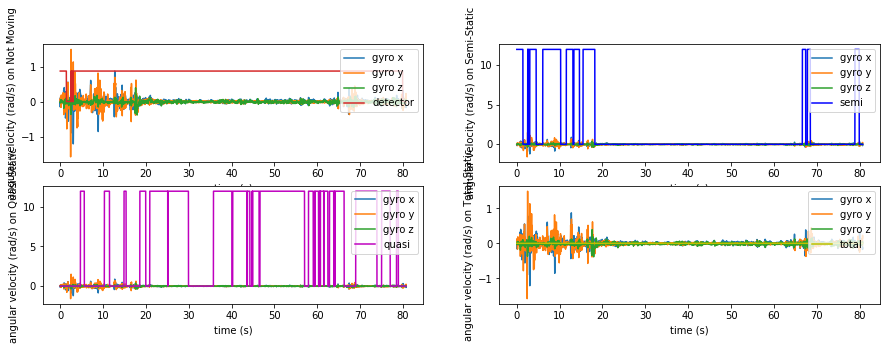

In [253]:
plt.figure(figsize=(15,10))
plt.subplot(421)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Not Moving')

plt.subplot(422)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static_semi*np.max(acc_z),'b')
plt.legend(['gyro x','gyro y','gyro z','semi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Semi-Static')

plt.subplot(423)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static_quasi*np.max(acc_z),'m')
plt.legend(['gyro x','gyro y','gyro z','quasi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Quasi-Static')

plt.subplot(424)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static_total*np.max(acc_z),'y')
plt.legend(['gyro x','gyro y','gyro z','total'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Total-Static')

# 3 Stand and Hold Cellphone

In [254]:
std = pd.read_csv('/Users/Joanna/Documents/PhD/Polaris_Wireless/NLE/Git/new/3d-tracking-at-gt-main/Station_Detection/meas/stand.csv', index_col = None, header = None)[0:100000]

In [255]:
std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

### Acceleration

In [256]:
std_acc = std[std[1]==' ACC_UN']

In [257]:
acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

In [258]:
acc_t = std_acc[0].values

Text(0,0.5,u'acceleration (m/s^2)')

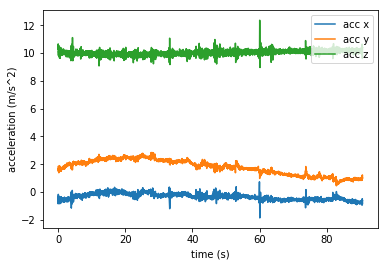

In [259]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

### Gyroscope

In [260]:
std_gyro = std[std[1]==' GYRO_UN']

In [261]:
gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

In [262]:
gyro_t = std_gyro[0].values

Text(0,0.5,u'angular velocity (rad/s)')

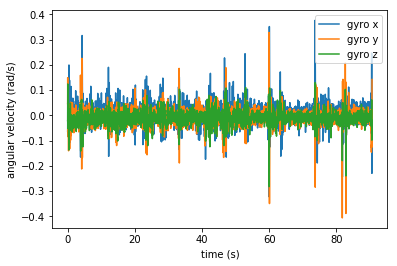

In [263]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

### Stability Detection

In [264]:
g = np.mean(acc_z)
g

10.037088260039395

In [265]:
#w_min = 0.3
w_max = 1.1

In [266]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))

In [267]:
std_static  = np.zeros(len(acc_t))
std_static_quasi  = np.zeros(len(acc_t))
std_static_semi  = np.zeros(len(acc_t))
std_static_total  = np.zeros(len(acc_t))

In [268]:
i = 0
while(acc_t[i] + w_max < round(acc_t[-1])):
        
        # increase to max window size
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
        
        ## update parameters
        if std_acc[i] < 1 and std_gyro[i] < 0.5:
            std_static[i] = 1
            
        if std_acc[i] < 1 and std_acc[i] >= 0.3 and std_gyro[i] < 0.5 and std_gyro[i] >= 0.1:
            std_static_semi[i] = 1
            
        if std_acc[i] < 0.3 and std_acc[i] >= 0.1 and std_gyro[i] < 0.1 and std_gyro[i] >= 0.01:
            std_static_quasi[i] = 1
        
        if std_acc[i] < 0.1 and std_gyro[i] < 0.01:
            std_static_total[i] = 1
    
    ##############
        i = i + 1

Text(0.5,1,u'Detection on Total-Static')

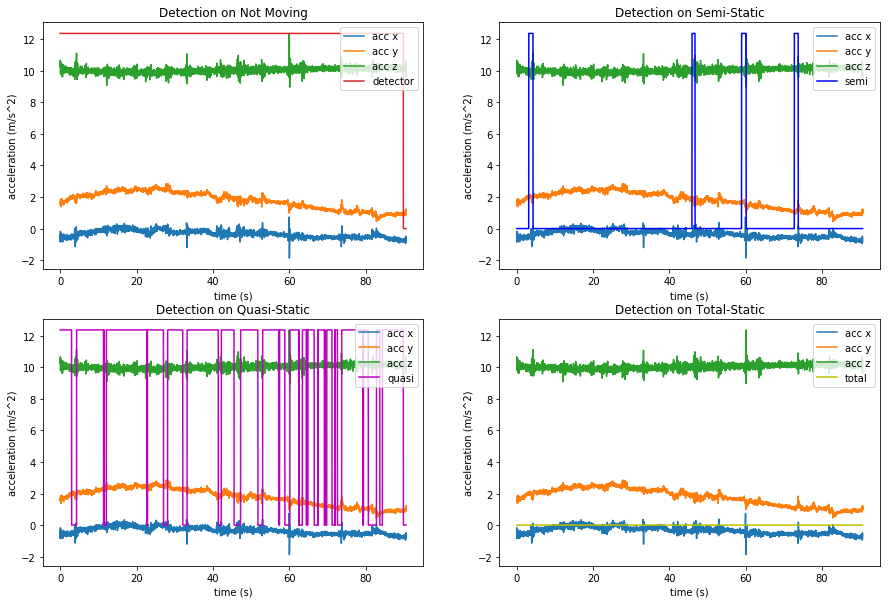

In [269]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static*np.max(acc_z))
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Not Moving')

plt.subplot(222)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static_semi*np.max(acc_z),'b')
plt.legend(['acc x','acc y','acc z','semi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Semi-Static')

plt.subplot(223)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static_quasi*np.max(acc_z),'m')
plt.legend(['acc x','acc y','acc z','quasi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Quasi-Static')

plt.subplot(224)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static_total*np.max(acc_z),'y')
plt.legend(['acc x','acc y','acc z','total'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Total-Static')

Text(0,0.5,u'angular velocity (rad/s) on Total-Static')

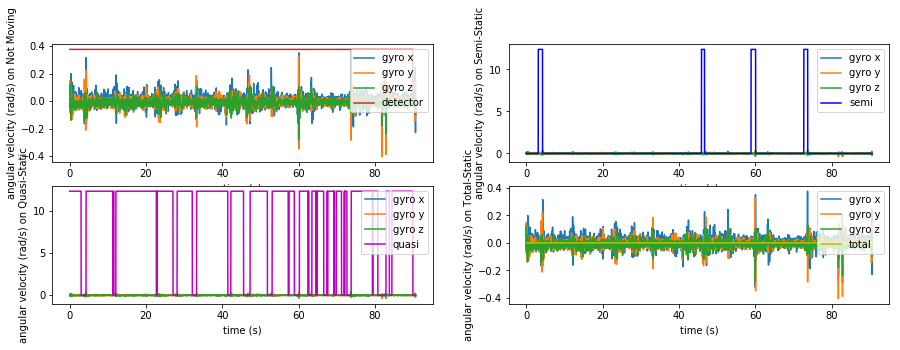

In [270]:
plt.figure(figsize=(15,10))
plt.subplot(421)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Not Moving')

plt.subplot(422)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static_semi*np.max(acc_z),'b')
plt.legend(['gyro x','gyro y','gyro z','semi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Semi-Static')

plt.subplot(423)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static_quasi*np.max(acc_z),'m')
plt.legend(['gyro x','gyro y','gyro z','quasi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Quasi-Static')

plt.subplot(424)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static_total*np.max(acc_z),'y')
plt.legend(['gyro x','gyro y','gyro z','total'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Total-Static')

# 4 Walk Holding Cellphone

In [301]:
std = pd.read_csv('/Users/Joanna/Documents/PhD/Polaris_Wireless/NLE/Git/new/3d-tracking-at-gt-main/Station_Detection/meas/walk.csv', index_col = None, header = None)[0:100000]

In [302]:
std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

### Acceleration

In [303]:
std_acc = std[std[1]==' ACC_UN']

In [304]:
acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

In [305]:
acc_t = std_acc[0].values

Text(0,0.5,u'acceleration (m/s^2)')

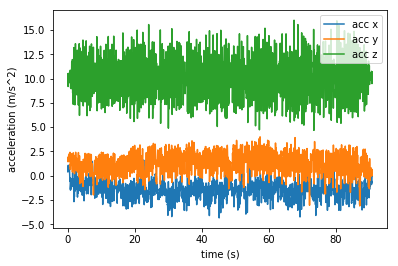

In [306]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

### Gyroscope

In [307]:
std_gyro = std[std[1]==' GYRO_UN']

In [308]:
gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

In [309]:
gyro_t = std_gyro[0].values

Text(0,0.5,u'angular velocity (rad/s)')

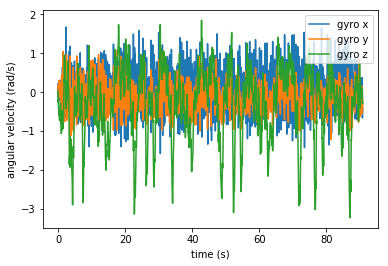

In [310]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

## Stability Detection

In [311]:
g = np.mean(acc_z)
g

10.058740292726212

In [312]:
sig_acc = g
sig_gyro = 0 + 0.5

In [313]:
#w_min = 0.3
w_max = 1.1

In [314]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))

In [315]:
std_static  = np.zeros(len(acc_t))
std_static_quasi  = np.zeros(len(acc_t))
std_static_semi  = np.zeros(len(acc_t))
std_static_total  = np.zeros(len(acc_t))

In [316]:
i = 0
while(acc_t[i] + w_max < round(acc_t[-1])):
        
        # increase to max window size
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
        
        ## update parameters
        if std_acc[i] < 1 and std_gyro[i] < 0.5:
            std_static[i] = 1
            
        if std_acc[i] < 1 and std_acc[i] >= 0.3 and std_gyro[i] < 0.5 and std_gyro[i] >= 0.1:
            std_static_semi[i] = 1
            
        if std_acc[i] < 0.3 and std_acc[i] >= 0.1 and std_gyro[i] < 0.1 and std_gyro[i] >= 0.01:
            std_static_quasi[i] = 1
        
        if std_acc[i] < 0.1 and std_gyro[i] < 0.01:
            std_static_total[i] = 1
    
    ##############
        i = i + 1

Text(0.5,1,u'Detection on Total-Static')

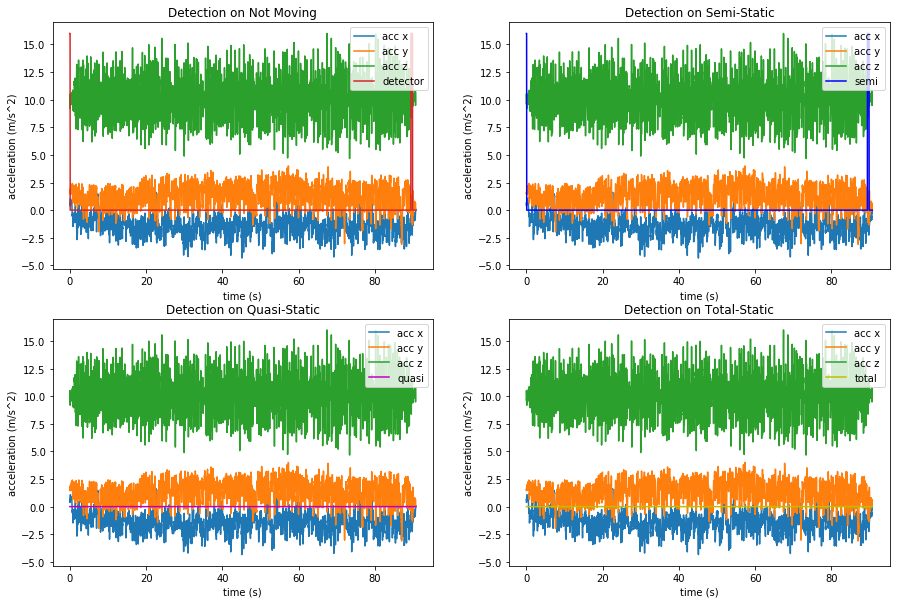

In [317]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static*np.max(acc_z))
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Not Moving')

plt.subplot(222)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static_semi*np.max(acc_z),'b')
plt.legend(['acc x','acc y','acc z','semi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Semi-Static')

plt.subplot(223)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static_quasi*np.max(acc_z),'m')
plt.legend(['acc x','acc y','acc z','quasi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Quasi-Static')

plt.subplot(224)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static_total*np.max(acc_z),'y')
plt.legend(['acc x','acc y','acc z','total'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Total-Static')

Text(0,0.5,u'angular velocity (rad/s) on Total-Static')

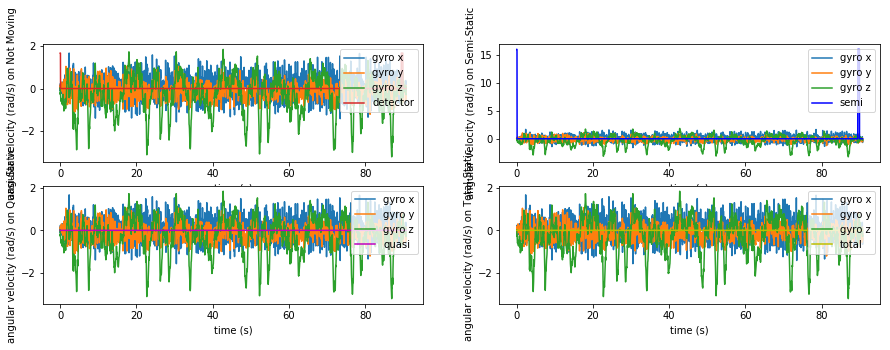

In [318]:
plt.figure(figsize=(15,10))
plt.subplot(421)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Not Moving')

plt.subplot(422)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static_semi*np.max(acc_z),'b')
plt.legend(['gyro x','gyro y','gyro z','semi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Semi-Static')

plt.subplot(423)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static_quasi*np.max(acc_z),'m')
plt.legend(['gyro x','gyro y','gyro z','quasi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Quasi-Static')

plt.subplot(424)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static_total*np.max(acc_z),'y')
plt.legend(['gyro x','gyro y','gyro z','total'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Total-Static')

# 5 Run Holding Cellphone

In [319]:
std = pd.read_csv('/Users/Joanna/Documents/PhD/Polaris_Wireless/NLE/Git/new/3d-tracking-at-gt-main/Station_Detection/meas/run.csv', index_col = None, header = None)[0:100000]

In [320]:
std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

### Acceleration

In [321]:
std_acc = std[std[1]==' ACC_UN']

In [322]:
acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

In [323]:
acc_t = std_acc[0].values

Text(0,0.5,u'acceleration (m/s^2)')

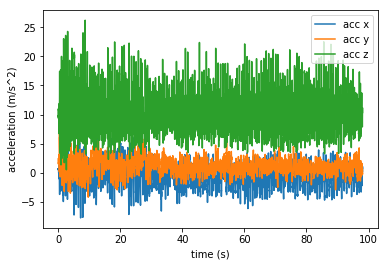

In [324]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

### Gyroscope

In [325]:
std_gyro = std[std[1]==' GYRO_UN']

In [326]:
gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

In [327]:
gyro_t = std_gyro[0].values

Text(0,0.5,u'angular velocity (rad/s)')

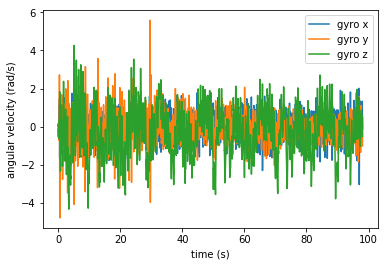

In [328]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

## Stability Detection

In [329]:
g = np.mean(acc_z)
g

10.17950062387785

In [330]:
#w_min = 0.3
w_max = 1.1

In [331]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))

In [332]:
std_static  = np.zeros(len(acc_t))
std_static_quasi  = np.zeros(len(acc_t))
std_static_semi  = np.zeros(len(acc_t))
std_static_total  = np.zeros(len(acc_t))

In [333]:
i = 0
while(acc_t[i] + w_max < round(acc_t[-1])):
        
        # increase to max window size
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
        
        ## update parameters
        if std_acc[i] < 1 and std_gyro[i] < 0.5:
            std_static[i] = 1
            
        if std_acc[i] < 1 and std_acc[i] >= 0.3 and std_gyro[i] < 0.5 and std_gyro[i] >= 0.1:
            std_static_semi[i] = 1
            
        if std_acc[i] < 0.3 and std_acc[i] >= 0.1 and std_gyro[i] < 0.1 and std_gyro[i] >= 0.01:
            std_static_quasi[i] = 1
        
        if std_acc[i] < 0.1 and std_gyro[i] < 0.01:
            std_static_total[i] = 1
    
    ##############
        i = i + 1

Text(0.5,1,u'Detection on Total-Static')

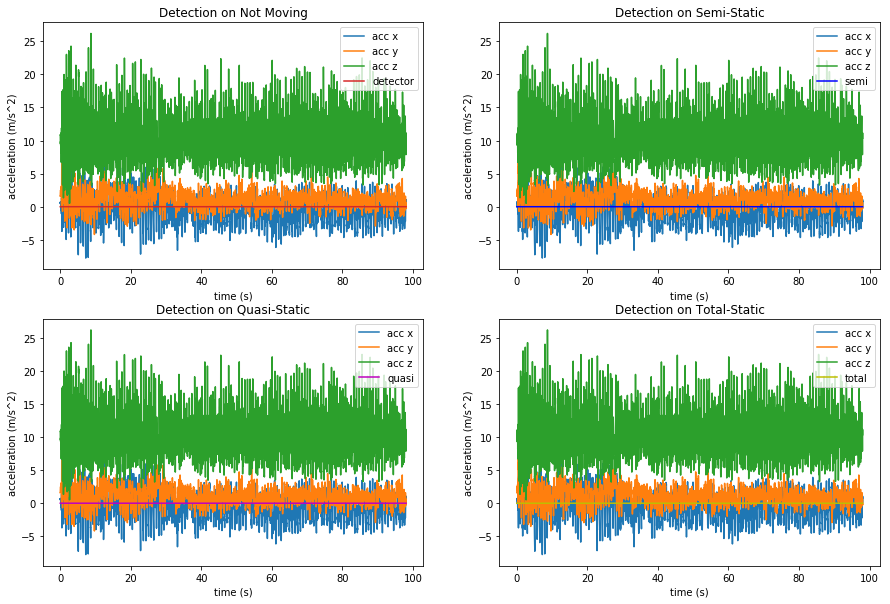

In [334]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static*np.max(acc_z))
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Not Moving')

plt.subplot(222)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static_semi*np.max(acc_z),'b')
plt.legend(['acc x','acc y','acc z','semi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Semi-Static')

plt.subplot(223)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static_quasi*np.max(acc_z),'m')
plt.legend(['acc x','acc y','acc z','quasi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Quasi-Static')

plt.subplot(224)
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static_total*np.max(acc_z),'y')
plt.legend(['acc x','acc y','acc z','total'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Total-Static')

Text(0,0.5,u'angular velocity (rad/s) on Total-Static')

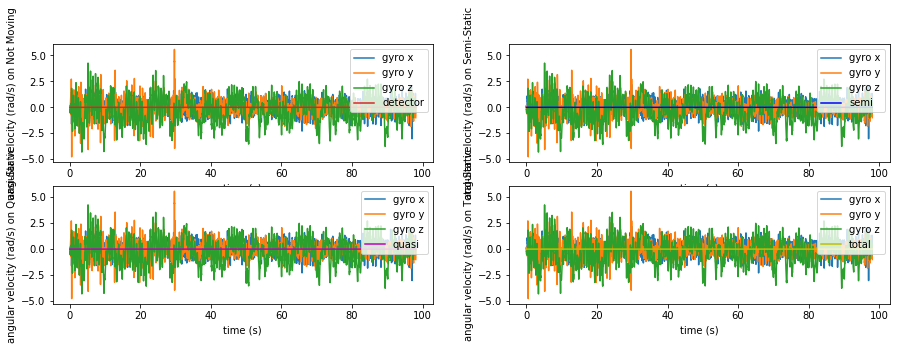

In [335]:
plt.figure(figsize=(15,10))
plt.subplot(421)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Not Moving')

plt.subplot(422)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static_semi*np.max(acc_z),'b')
plt.legend(['gyro x','gyro y','gyro z','semi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Semi-Static')

plt.subplot(423)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static_quasi*np.max(acc_z),'m')
plt.legend(['gyro x','gyro y','gyro z','quasi'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Quasi-Static')

plt.subplot(424)
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static_total*np.max(acc_z),'y')
plt.legend(['gyro x','gyro y','gyro z','total'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s) on Total-Static')